In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [69]:
trdata=pd.read_excel("data_train.xlsx")
trdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [70]:
trdata.shape

(10683, 11)

In [71]:
trdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [72]:
trdata.dropna(inplace=True)

In [73]:
trdata.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [74]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [75]:
trdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [76]:
trdata['journey day']=pd.to_datetime(trdata.Date_of_Journey).dt.day

In [77]:
trdata['journey month']=pd.to_datetime(trdata.Date_of_Journey).dt.month

In [78]:
trdata['Arrival hour']=pd.to_datetime(trdata.Arrival_Time).dt.hour

In [79]:
trdata['arrival min']=pd.to_datetime(trdata.Arrival_Time).dt.minute

In [80]:
trdata['dep hour']=pd.to_datetime(trdata.Dep_Time).dt.hour

In [81]:
trdata['dep min']=pd.to_datetime(trdata.Dep_Time).dt.minute

In [82]:
trdata

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,Arrival hour,arrival min,dep hour,dep min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,22,25,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,23,20,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,11,20,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,14,10,11,30


In [83]:
trdata.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [84]:
trdata

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,Arrival hour,arrival min,dep hour,dep min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,14,10,11,30


<AxesSubplot:xlabel='Airline', ylabel='count'>

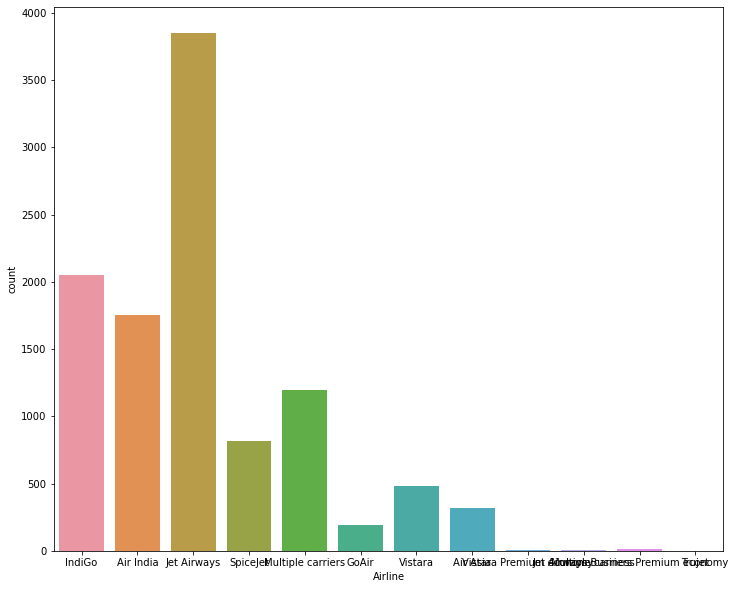

In [85]:
plt.figure(figsize=(12,10))
sns.countplot(trdata['Airline'])

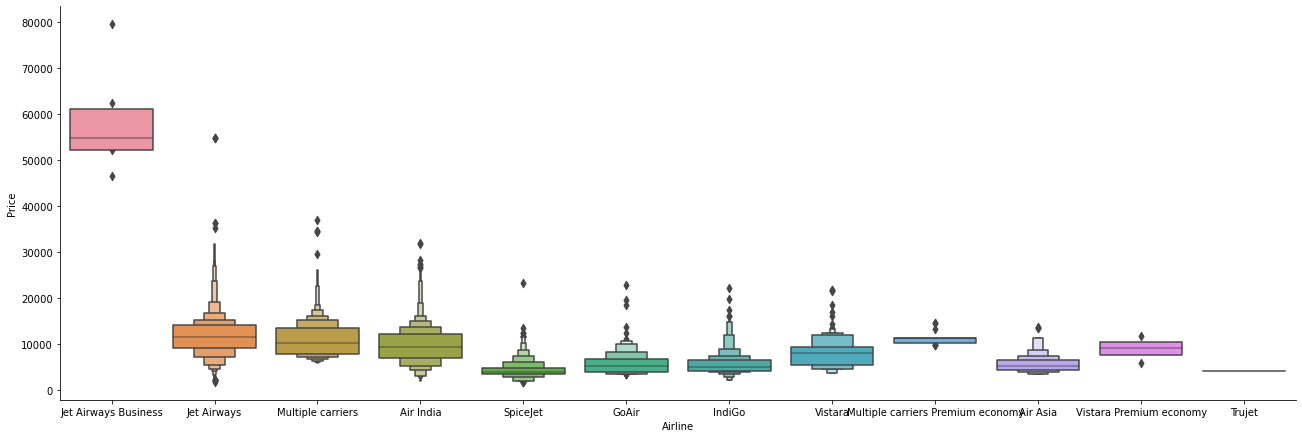

In [86]:
sns.catplot(x='Airline',y='Price',data=trdata.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

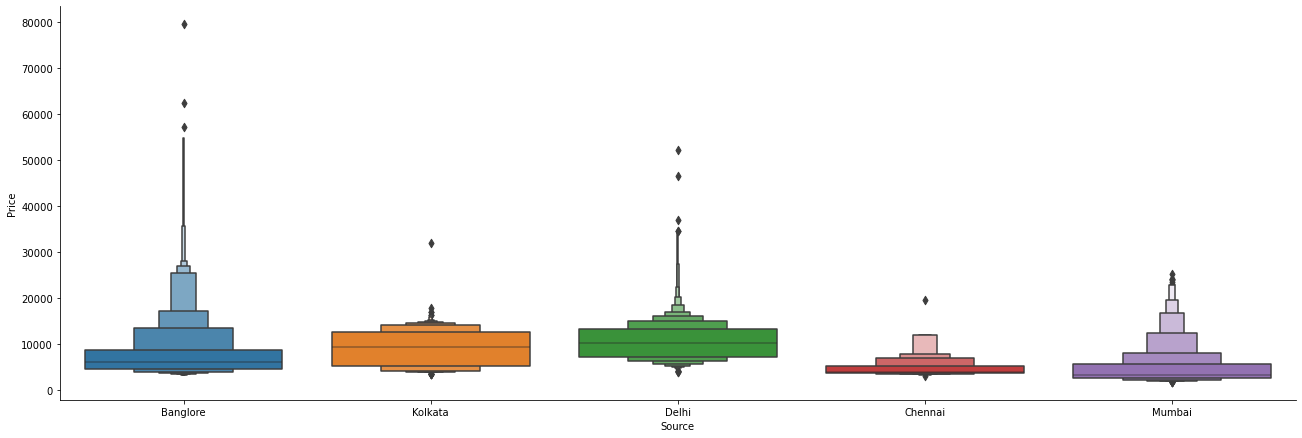

In [87]:
sns.catplot(x='Source',y='Price',data=trdata,kind='boxen',height=6,aspect=3)

<AxesSubplot:xlabel='Destination', ylabel='count'>

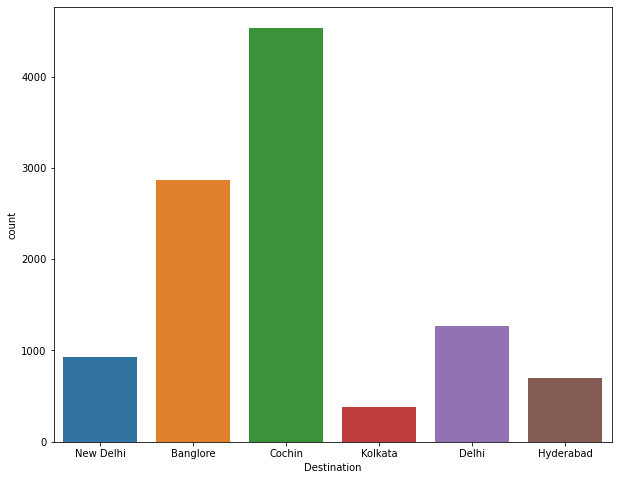

In [88]:
plt.figure(figsize=(10,8))
sns.countplot(trdata['Destination'])

In [89]:
Airline=trdata[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [90]:
Source=trdata[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [91]:
Destination=trdata["Destination"]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [92]:
traindata=pd.concat([trdata,Source,Destination,Airline],axis=1)

In [93]:
traindata.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey day,journey month,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,...,0,1,0,0,0,0,0,0,0,0


In [94]:
traindata['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [95]:
traindata['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → COK → MAA → HYD                   1
CCU → IXB → DEL → BLR                   1
CCU → IXA → BLR                         1
BOM → RPR → VTZ → HYD                   1
Name: Route, Length: 128, dtype: int64

In [96]:
traindata.drop(['Airline',"Source","Destination","Route","Additional_Info"],inplace=True,axis=1)

In [97]:
traindata

,Duration,Total_Stops,Price,journey day,journey month,Arrival hour,arrival min,dep hour,dep min,Source_Chennai,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,2h 50m,non-stop,3897,24,3,1,10,22,20,0,...,0,1,0,0,0,0,0,0,0,0
1,7h 25m,2 stops,7662,5,1,13,15,5,50,0,...,0,0,0,0,0,0,0,0,0,0
2,19h,2 stops,13882,6,9,4,25,9,25,0,...,0,0,1,0,0,0,0,0,0,0
3,5h 25m,1 stop,6218,5,12,23,30,18,5,0,...,0,1,0,0,0,0,0,0,0,0
4,4h 45m,1 stop,13302,3,1,21,35,16,50,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,non-stop,4107,4,9,22,25,19,55,0,...,0,0,0,0,0,0,0,0,0,0
10679,2h 35m,non-stop,4145,27,4,23,20,20,45,0,...,0,0,0,0,0,0,0,0,0,0
10680,3h,non-stop,7229,27,4,11,20,8,20,0,...,0,0,1,0,0,0,0,0,0,0
10681,2h 40m,non-stop,12648,3,1,14,10,11,30,0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
duration = list(traindata["Duration"])

for i in range(len(duration)):
        if len(duration[i].split()) != 2:
            
            if  "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"   
            else:
                duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [99]:
traindata['duration_hours']=duration_hours
traindata['duration_mins']=duration_mins

In [100]:
traindata

,Duration,Total_Stops,Price,journey day,journey month,Arrival hour,arrival min,dep hour,dep min,Source_Chennai,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,duration_hours,duration_mins
0,2h 50m,non-stop,3897,24,3,1,10,22,20,0,...,0,0,0,0,0,0,0,0,2,50
1,7h 25m,2 stops,7662,5,1,13,15,5,50,0,...,0,0,0,0,0,0,0,0,7,25
2,19h,2 stops,13882,6,9,4,25,9,25,0,...,1,0,0,0,0,0,0,0,19,0
3,5h 25m,1 stop,6218,5,12,23,30,18,5,0,...,0,0,0,0,0,0,0,0,5,25
4,4h 45m,1 stop,13302,3,1,21,35,16,50,0,...,0,0,0,0,0,0,0,0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,non-stop,4107,4,9,22,25,19,55,0,...,0,0,0,0,0,0,0,0,2,30
10679,2h 35m,non-stop,4145,27,4,23,20,20,45,0,...,0,0,0,0,0,0,0,0,2,35
10680,3h,non-stop,7229,27,4,11,20,8,20,0,...,1,0,0,0,0,0,0,0,3,0
10681,2h 40m,non-stop,12648,3,1,14,10,11,30,0,...,0,0,0,0,0,0,1,0,2,40


In [101]:
traindata['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [102]:
traindata.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [103]:
traindata.drop('Duration',axis=1,inplace=True)

In [104]:
traindata

,Total_Stops,Price,journey day,journey month,Arrival hour,arrival min,dep hour,dep min,Source_Chennai,Source_Delhi,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,duration_hours,duration_mins
0,0,3897,24,3,1,10,22,20,0,0,...,0,0,0,0,0,0,0,0,2,50
1,2,7662,5,1,13,15,5,50,0,0,...,0,0,0,0,0,0,0,0,7,25
2,2,13882,6,9,4,25,9,25,0,1,...,1,0,0,0,0,0,0,0,19,0
3,1,6218,5,12,23,30,18,5,0,0,...,0,0,0,0,0,0,0,0,5,25
4,1,13302,3,1,21,35,16,50,0,0,...,0,0,0,0,0,0,0,0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,22,25,19,55,0,0,...,0,0,0,0,0,0,0,0,2,30
10679,0,4145,27,4,23,20,20,45,0,0,...,0,0,0,0,0,0,0,0,2,35
10680,0,7229,27,4,11,20,8,20,0,0,...,1,0,0,0,0,0,0,0,3,0
10681,0,12648,3,1,14,10,11,30,0,0,...,0,0,0,0,0,0,1,0,2,40


now lets check the test data

In [105]:
tsdata=pd.read_excel("test_set.xlsx")

In [106]:
tsdata

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [107]:
tsdata.shape

(2671, 10)

In [108]:
tsdata.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [109]:
tsdata['journey day']=pd.to_datetime(tsdata.Date_of_Journey).dt.day

In [110]:
tsdata['journey month']=pd.to_datetime(tsdata.Date_of_Journey).dt.month

In [111]:
tsdata['Arrival hour']=pd.to_datetime(tsdata.Arrival_Time).dt.hour

In [112]:
tsdata['arrival min']=pd.to_datetime(tsdata.Arrival_Time).dt.minute

In [113]:
tsdata['dep hour']=pd.to_datetime(tsdata.Dep_Time).dt.hour

In [114]:
tsdata['dep min']=pd.to_datetime(tsdata.Dep_Time).dt.minute

In [115]:
tsdata

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey day,journey month,Arrival hour,arrival min,dep hour,dep min
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12,10,20,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,21,0,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6,20,25,20,30
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3,16,55,14,20
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,3,6,4,25,21,50
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,3,6,19,15,4,0


In [116]:
tsdata.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

<AxesSubplot:xlabel='Airline', ylabel='count'>

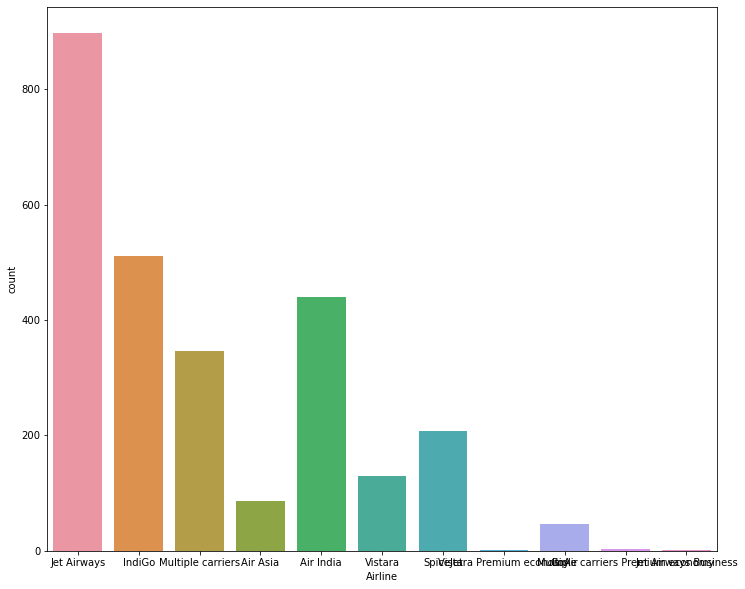

In [117]:
plt.figure(figsize=(12,10))
sns.countplot(tsdata['Airline'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

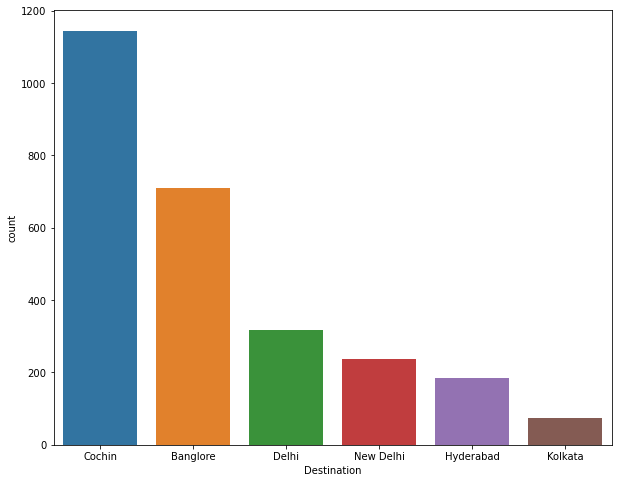

In [118]:

plt.figure(figsize=(10,8))
sns.countplot(tsdata['Destination'])

In [119]:

Airline=tsdata[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [120]:
Source=tsdata[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [121]:
Destination=tsdata["Destination"]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [122]:
testdata=pd.concat([tsdata,Source,Destination,Airline],axis=1)

In [123]:
testdata.drop(['Airline',"Source","Destination","Route","Additional_Info"],inplace=True,axis=1)

In [124]:
duration = list(testdata["Duration"])

for i in range(len(duration)):
        if len(duration[i].split()) != 2:
            
            if  "h" in duration[i]:
                duration[i] = duration[i].strip() + " 0m"   
            else:
                duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [125]:
testdata['duration_hours']=duration_hours
testdata['duration_mins']=duration_mins

In [126]:
testdata.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [127]:
testdata.drop('Duration',axis=1,inplace=True)

In [128]:
testdata

,Total_Stops,journey day,journey month,Arrival hour,arrival min,dep hour,dep min,Source_Chennai,Source_Delhi,Source_Kolkata,...,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,duration_hours,duration_mins
0,1,6,6,4,25,17,30,0,1,0,...,0,1,0,0,0,0,0,0,10,55
1,1,5,12,10,20,6,20,0,0,1,...,1,0,0,0,0,0,0,0,4,0
2,1,21,5,19,0,19,15,0,1,0,...,0,1,0,0,0,0,0,0,23,45
3,1,21,5,21,0,8,0,0,1,0,...,0,0,0,1,0,0,0,0,13,0
4,0,24,6,2,45,23,55,0,0,0,...,0,0,0,0,0,0,0,0,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,25,20,30,0,0,1,...,0,0,0,0,0,0,0,0,23,55
2667,0,27,3,16,55,14,20,0,0,1,...,1,0,0,0,0,0,0,0,2,35
2668,1,3,6,4,25,21,50,0,1,0,...,0,1,0,0,0,0,0,0,6,35
2669,1,3,6,19,15,4,0,0,1,0,...,0,0,0,0,0,0,0,0,15,15


In [129]:
x=traindata.drop('Price',axis=1)
y=traindata['Price']

In [130]:
x

,Total_Stops,journey day,journey month,Arrival hour,arrival min,dep hour,dep min,Source_Chennai,Source_Delhi,Source_Kolkata,...,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,duration_hours,duration_mins
0,0,24,3,1,10,22,20,0,0,0,...,0,0,0,0,0,0,0,0,2,50
1,2,5,1,13,15,5,50,0,0,1,...,0,0,0,0,0,0,0,0,7,25
2,2,6,9,4,25,9,25,0,1,0,...,1,0,0,0,0,0,0,0,19,0
3,1,5,12,23,30,18,5,0,0,1,...,0,0,0,0,0,0,0,0,5,25
4,1,3,1,21,35,16,50,0,0,0,...,0,0,0,0,0,0,0,0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4,9,22,25,19,55,0,0,1,...,0,0,0,0,0,0,0,0,2,30
10679,0,27,4,23,20,20,45,0,0,1,...,0,0,0,0,0,0,0,0,2,35
10680,0,27,4,11,20,8,20,0,0,0,...,1,0,0,0,0,0,0,0,3,0
10681,0,3,1,14,10,11,30,0,0,0,...,0,0,0,0,0,0,1,0,2,40


In [131]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

<AxesSubplot:>

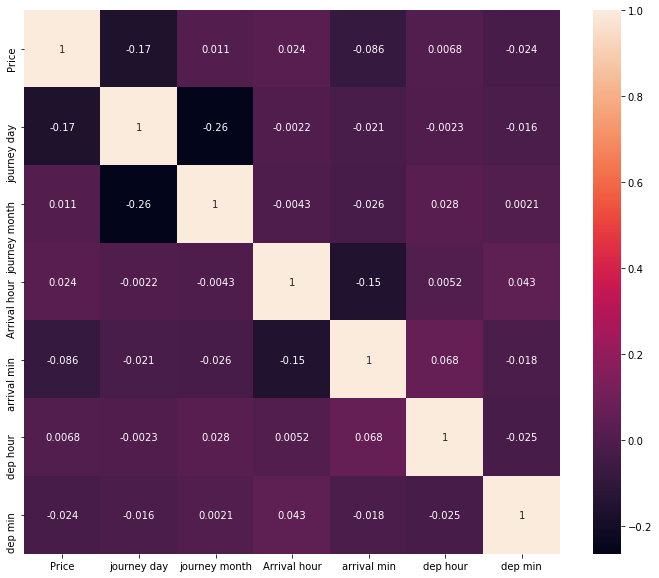

In [132]:
plt.figure(figsize=(12,10))
sns.heatmap(trdata.corr(),annot=True)

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.25)

In [175]:
xtr=ExtraTreesRegressor()
xtr.fit(x_train,y_train)
xtr.score(x_train,y_train)

0.9723606913710775

In [176]:
pred_test=xtr.predict(x_test)

In [136]:
print(xtr.feature_importances_)

[2.26977406e-01 1.10478849e-01 9.00051072e-02 3.12091855e-02
 2.13084448e-02 2.71832816e-02 2.39964237e-02 5.59630334e-04
 9.31350912e-03 4.75206199e-03 5.06241323e-03 7.03737229e-03
 1.53125740e-02 7.31872789e-03 5.14225653e-04 2.68995840e-02
 1.07617109e-02 2.21240192e-03 1.80743053e-02 1.41593208e-01
 5.07751053e-02 1.90794756e-02 8.40281157e-04 3.90252180e-03
 1.67551840e-04 5.11072078e-03 7.00699246e-05 1.19592112e-01
 1.98917391e-02]


<function matplotlib.pyplot.show(close=None, block=None)>

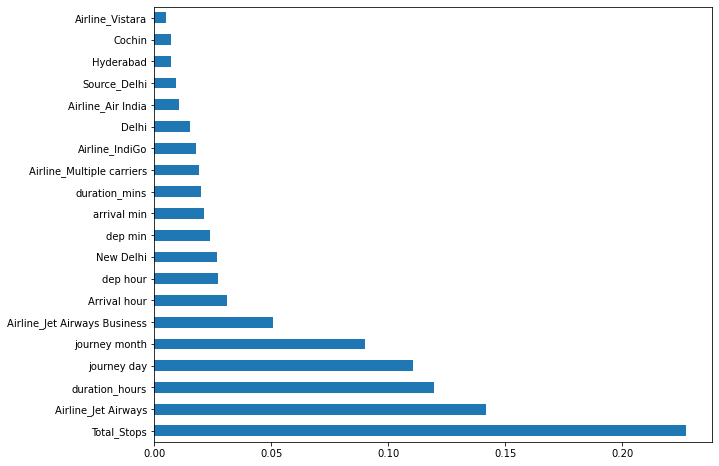

In [137]:
plt.figure(figsize=(10,8))
imp=pd.Series(xtr.feature_importances_,x.columns)
imp.nlargest(20).plot(kind='barh')
plt.show

these are the contributing features towards our output variable(price)
now lets check some algorithms which gives best output

In [138]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.6069749722745973

In [139]:
lr.score(x_test,y_test)

0.6471728686684213

In [140]:
predlr=lr.predict(x_test)

In [141]:
print('mae:',mean_absolute_error(y_test,predlr))
print('mse:',mean_squared_error(y_test,predlr))
print('rmse:',np.sqrt(mean_squared_error(y_test,predlr)))

mae: 1979.3834899242065
mse: 7645847.861278361
rmse: 2765.112630848581


<AxesSubplot:xlabel='Price', ylabel='Density'>

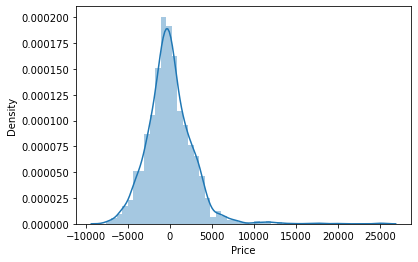

In [142]:
sns.distplot(y_test-predlr)

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [144]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

0.972360811960408

In [145]:
preddtr=dtr.predict(x_test)

In [146]:
dtr.score(x_test,y_test)

0.7022216072834894

<AxesSubplot:xlabel='Price', ylabel='Density'>

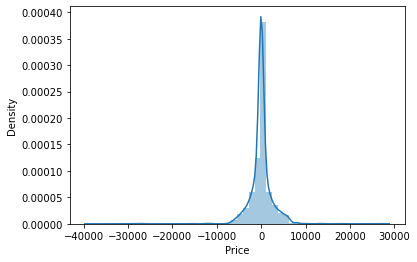

In [147]:
sns.distplot(y_test-preddtr)

In [148]:
from sklearn.neighbors import KNeighborsRegressor


In [149]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.7109337082064029

In [150]:
predknr=knr.predict(x_test)

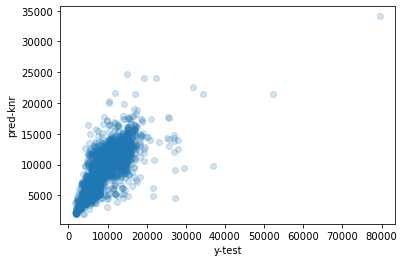

In [151]:
plt.scatter(y_test,predknr,alpha=0.2)
plt.xlabel('y-test')
plt.ylabel('pred-knr')
plt.show()

In [152]:
metrics.r2_score(y_test,predknr)

0.5999051234198249

In [153]:
from sklearn.ensemble import RandomForestRegressor

In [154]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)


RandomForestRegressor()

In [155]:
rf.score(x_train,y_train)

0.9527414826791714

In [156]:
predrf=rf.predict(x_test)

Text(0, 0.5, 'pred dtr')

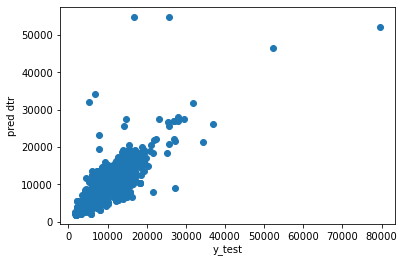

In [157]:
plt.scatter(y_test,preddtr)
plt.xlabel('y_test')
plt.ylabel('pred dtr')

<AxesSubplot:xlabel='Price', ylabel='Density'>

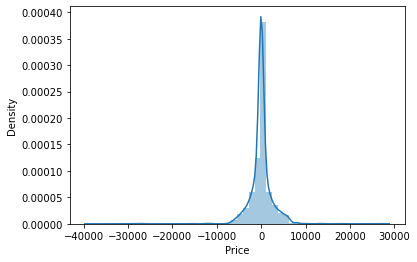

In [158]:
sns.distplot(y_test-preddtr)

now lets check for cross validation  for different algorithms

In [159]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [160]:
model=RandomForestRegressor()
KFold_validation=KFold(10)

In [161]:
results=cross_val_score(model,x,y,cv=KFold_validation)
print(results)
print(np.mean(results))

[0.81771358 0.79681606 0.80728686 0.81569573 0.83034102 0.83826914
 0.80451915 0.83229323 0.79171677 0.67584626]
0.801049782439762


In [162]:
model1=DecisionTreeRegressor()
results=cross_val_score(model1,x,y,cv=KFold_validation)
print(results)
print(np.mean(results))

[0.74861431 0.73733614 0.75958887 0.67042071 0.73908341 0.73645002
 0.70256893 0.73244367 0.69123714 0.52863116]
0.7046374348161608


In [163]:
model2=ExtraTreesRegressor()
results=cross_val_score(model2,x,y,cv=KFold_validation)
print(results)
print(np.mean(results))

[0.7681446  0.78756476 0.78317942 0.78974723 0.78168031 0.81643585
 0.76435623 0.78274981 0.76983509 0.77003179]
0.7813725083650266


lets go with the extratreesregressor because its minimum and maximum accuracy is very close and mean of the accuracy is 79%

now lets check the best params using randomized searchcv because it is comparetively fast than gridsearch

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [166]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [167]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [168]:
xtr=ExtraTreesRegressor()
xtr_random=RandomizedSearchCV(estimator=xtr,n_iter=10,param_distributions=random_grid,n_jobs=10,verbose=2)
xtr_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=ExtraTreesRegressor(), n_jobs=10,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [169]:
print(xtr_random.best_params_)

{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 25}


In [170]:
pred=xtr_random.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

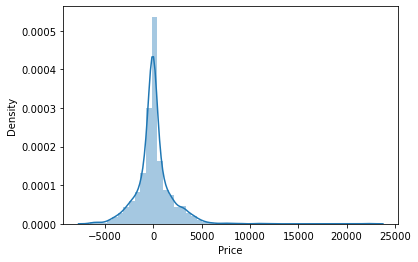

In [171]:
sns.distplot(y_test-pred)


In [172]:
import pickle
filename="flightpred.pkl"
pickle.dump(xtr,open(filename,"wb"))

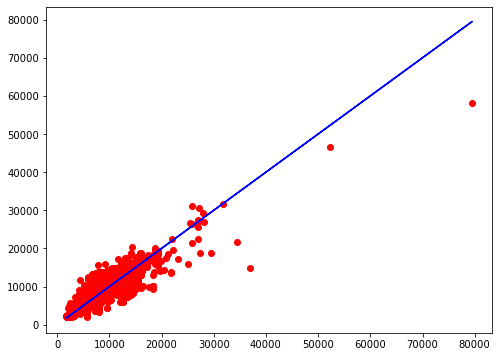

In [177]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color="r")
plt.plot(y_test,y_test,color="b")
plt.title=("linear regression")
plt.show()